在密集奖励的环境中，训练期间会频繁接收到奖励，从而更容易强化行为。在稀疏奖励的环境中，只有在很多子问题得以解决后才能获得奖励，使得智能体很难甚至无法基于奖励信号进行学习。

利用预测编码处理稀疏奖励。在预测编码模型中，理论上说从单个神经元到大规模神经网络的所有神经系统都在运行一种算法，该算法试图预测输入，并试图最小化期望体验与真实体验之间的预测误差。

稀疏奖励问题是指环境很少产生有用的奖励信号，这严重影响了普通DRL试图学习的方式

稀疏奖励问题可以通过创建综合奖励信号来解决，我们称该奖励信号为好奇心奖励

好奇心模块基于环境下一个状态的不可预测性来创建综合奖励，从而鼓励智能体探索环境中更多不可预测的部分

内置好奇心模块（ICM）由 3 个独立的神经网络组成：一个正向模型、一个反向模型、一个编码器模型

编码器模型将高维状态编码成一个具有高级特征的低维向量（消除噪声和琐碎特征）

正向模型预测下一个编码状态，其误差提供好奇心信号

反向模型通过接收两个连续的编码状态并预测所采取的动作来训练编码器

授权是一种基于好奇心的学习密切相关的可替代方法。授权方法会激励智能体学习如何最大限度的控制环境。

In [1]:
%pip list


Package              Version
-------------------- ---------
ale-py               0.9.1
appnope              0.1.4
asttokens            3.0.0
backcall             0.2.0
Brotli               1.1.0
certifi              2024.8.30
cffi                 1.17.0
charset-normalizer   3.4.0
cloudpickle          3.1.0
comm                 0.2.2
contourpy            1.1.1
cycler               0.11.0
debugpy              1.8.5
decorator            5.1.1
executing            2.1.0
Farama-Notifications 0.0.4
fonttools            4.53.1
gymnasium            0.29.1
h2                   4.1.0
hpack                4.0.0
hyperframe           6.0.1
idna                 3.10
importlib_metadata   8.5.0
importlib_resources  6.4.5
ipykernel            6.29.5
ipython              8.12.2
jax-jumpy            1.0.0
jedi                 0.19.1
jupyter_client       8.6.3
jupyter_core         5.7.2
kiwisolver           1.4.5
matplotlib           3.7.3
matplotlib-inline    0.1.7
munkres              1.1.4
nest_asyncio

In [4]:
%pip install nes-py==8.1.4 gym-super-mario-bros==7.3.0 gym==0.24.0

  Using cached nes_py-8.1.4.tar.gz (75 kB)
  Preparing metadata (setup.py) ... done
  Using cached gym_super_mario_bros-7.3.0-py2.py3-none-any.whl.metadata (9.4 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 694.4/694.4 kB 2.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
Using cached gym_super_mario_bros-7.3.0-py2.py3-none-any.whl (198 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 962.1/962.1 kB 1.5 MB/s eta 0:00:00a 0:00:01
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
  Created wheel for nes-py: filename=nes_py-8.1.4-cp38-cp38-macosx_11_0_arm64.whl size=46703 sha256=dfd961046de1ba6941029c1a75b7252ac2be272ec72021ea064d68b1446f2c80
  Stored in directory: /Users/qin/Library/Caches/pip/wheels/cc/b5/f5/3ddaa6ad6500829dc5e883752b69b43051c18b25931ba07c81
  Created wheel for gym: filename=gym-0.24.0-py3-none-any.whl si

In [9]:
%pip uninstall -y gym-super-mario-bros
%pip install gym-super-mario-bros==7.3.0

Found existing installation: gym-super-mario-bros 7.3.0
Uninstalling gym-super-mario-bros-7.3.0:
  Successfully uninstalled gym-super-mario-bros-7.3.0
Note: you may need to restart the kernel to use updated packages.
  Using cached gym_super_mario_bros-7.3.0-py2.py3-none-any.whl.metadata (9.4 kB)
Using cached gym_super_mario_bros-7.3.0-py2.py3-none-any.whl (198 kB)
Note: you may need to restart the kernel to use updated packages.


In [46]:
from nes_py.wrappers import JoypadSpace
import gym_super_mario_bros
from gym_super_mario_bros.actions import COMPLEX_MOVEMENT

try:
    # 新版本尝试
    env = gym_super_mario_bros.make('SuperMarioBros-v3', apply_api_compatibility=True, render_mode="rgb_array")
except TypeError:
    try:
        # 旧版本尝试
        env = gym_super_mario_bros.make('SuperMarioBros-v3')
    except Exception as e:
        print(f"创建环境失败: {e}")
        raise

env = JoypadSpace(env, COMPLEX_MOVEMENT)
print("环境创建成功!")

环境创建成功!


/opt/anaconda3/envs/rl/lib/python3.8/site-packages/gym/envs/registration.py:619: UserWarning: WARN: Env check failed with the following message: The reward returned by `step()` must be a float
You can set `disable_env_checker=True` to disable this check.
  logger.warn(


In [47]:
done = True
for step in range(2500): #D
    if done:
        state = env.reset()
    state, reward, done, info = env.step(env.action_space.sample())
    env.render()


In [5]:
%pip install scikit-image

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 1.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 1.7 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [8]:
%pip uninstall -y scipy scikit-image

Found existing installation: scipy 1.10.1
Uninstalling scipy-1.10.1:
  Successfully uninstalled scipy-1.10.1
Found existing installation: scikit-image 0.21.0
Uninstalling scikit-image-0.21.0:
  Successfully uninstalled scikit-image-0.21.0
Note: you may need to restart the kernel to use updated packages.


In [9]:
%conda install -y scipy scikit-image

Channels:
 - conda-forge
 - defaults
Platform: osx-arm64
Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3/envs/rl

  added / updated specs:
    - scikit-image
    - scipy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    aom-3.5.0                  |       h7ea286d_0         2.4 MB  conda-forge
    blosc-1.21.5               |       hc338f07_0          33 KB  conda-forge
    brotli-1.0.9               |       h1a8c8d9_9          20 KB  conda-forge
    brotli-bin-1.0.9           |       h1a8c8d9_9          18 KB  conda-forge
    brotli-python-1.0.9        |   py38h2b1e499_9         317 KB  conda-forge
    brunsli-0.1                |       h9f76cd9_0         174 KB  conda-forge
    c-ares-1.34.4              |       h5505292_0         175 KB  conda-forge
    c-blosc2-2.12.0            |       ha57e6be_0         231 KB  conda-forge
    cfitsio-4.2.0     

In [10]:
%conda install -y liblapack libblas

Channels:
 - conda-forge
 - defaults
Platform: osx-arm64
Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3/envs/rl

  added / updated specs:
    - libblas
    - liblapack


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    libblas-3.9.0              |20_osxarm64_openblas          14 KB  conda-forge
    libcblas-3.9.0             |20_osxarm64_openblas          14 KB  conda-forge
    libgfortran-5.0.0          |13_2_0_hd922786_3         108 KB  conda-forge
    libgfortran5-13.2.0        |       hf226fd6_3         974 KB  conda-forge
    liblapack-3.9.0            |20_osxarm64_openblas          14 KB  conda-forge
    libopenblas-0.3.25         |openmp_h6c19121_0         2.8 MB  conda-forge
    llvm-openmp-20.1.1         |       hdb05f8b_1         275 KB  conda-forge
    ------------------------------------------------------------
                           

In [13]:
%pip list

Package              Version
-------------------- ---------
ale-py               0.9.1
appnope              0.1.4
asttokens            3.0.0
backcall             0.2.0
Brotli               1.0.9
certifi              2024.8.30
cffi                 1.17.0
charset-normalizer   3.4.0
cloudpickle          3.1.0
comm                 0.2.2
contourpy            1.1.1
cycler               0.11.0
debugpy              1.8.5
decorator            5.1.1
executing            2.1.0
Farama-Notifications 0.0.4
filelock             3.16.1
fonttools            4.53.1
fsspec               2025.3.0
gym                  0.24.0
gym-notices          0.0.8
gym-super-mario-bros 7.3.0
gymnasium            0.29.1
h2                   4.1.0
hpack                4.0.0
hyperframe           6.0.1
idna                 3.10
imagecodecs          2023.1.23
imageio              2.35.1
importlib_metadata   8.5.0
importlib_resources  6.4.5
ipykernel            6.29.5
ipython              8.12.2
jax-jumpy            1.0.0
jed

In [16]:
%pip install scipy

  Using cached scipy-1.10.1-cp38-cp38-macosx_12_0_arm64.whl.metadata (53 kB)
Using cached scipy-1.10.1-cp38-cp38-macosx_12_0_arm64.whl (28.8 MB)
Note: you may need to restart the kernel to use updated packages.


In [48]:
import matplotlib.pyplot as plt
from skimage.transform import resize #A
import numpy as np

def downscale_obs(obs, new_size=(42,42), to_gray=True):
    if to_gray:
        return resize(obs, new_size, anti_aliasing=True).max(axis=2) #B
    else:
        return resize(obs, new_size, anti_aliasing=True)

In [49]:
# 检查渲染返回值
result = env.render()
print(f"Type: {type(result)}")
print(f"Value: {result}")

Type: <class 'NoneType'>
Value: None


Render返回类型: <class 'NoneType'>
无法获取游戏画面，显示空白图像


/var/folders/wt/t4q1f61n40x0vm0746z9p1hh0000gn/T/ipykernel_57047/952918727.py:38: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from current font.
  plt.tight_layout()
/var/folders/wt/t4q1f61n40x0vm0746z9p1hh0000gn/T/ipykernel_57047/952918727.py:38: UserWarning: Glyph 22987 (\N{CJK UNIFIED IDEOGRAPH-59CB}) missing from current font.
  plt.tight_layout()
/var/folders/wt/t4q1f61n40x0vm0746z9p1hh0000gn/T/ipykernel_57047/952918727.py:38: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.tight_layout()
/var/folders/wt/t4q1f61n40x0vm0746z9p1hh0000gn/T/ipykernel_57047/952918727.py:38: UserWarning: Glyph 20687 (\N{CJK UNIFIED IDEOGRAPH-50CF}) missing from current font.
  plt.tight_layout()
/var/folders/wt/t4q1f61n40x0vm0746z9p1hh0000gn/T/ipykernel_57047/952918727.py:38: UserWarning: Glyph 19979 (\N{CJK UNIFIED IDEOGRAPH-4E0B}) missing from current font.
  plt.tight_layout()
/var/folders/wt/t4q1f61n40x0vm0746z9p1hh0000gn/T/ipykernel_5

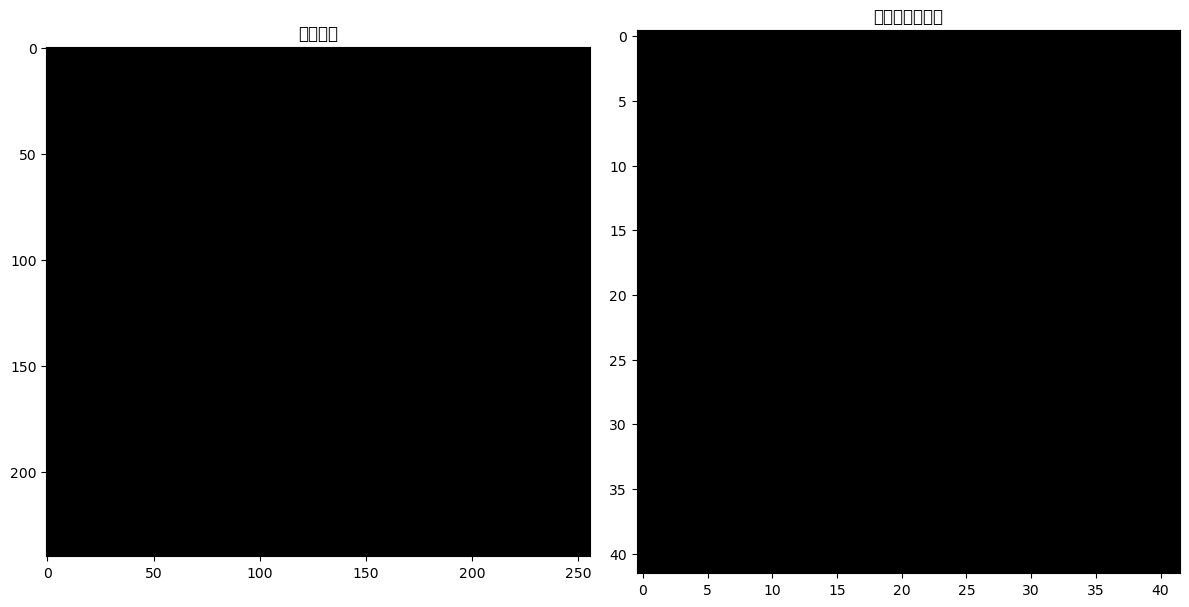

In [50]:
# 修复渲染显示问题
plt.figure(figsize=(12, 6))

# 获取游戏画面
try:
    # 尝试直接渲染
    screen = env.render()
    
    # 如果返回None，可能需要先reset环境
    if screen is None:
        env.reset()
        screen = env.render()
    
    # 如果返回的是字符串或其他非数组类型
    if not isinstance(screen, np.ndarray):
        print(f"Render返回类型: {type(screen)}")
        # 尝试获取帧缓冲区
        if hasattr(env, 'unwrapped') and hasattr(env.unwrapped, 'get_screen'):
            screen = env.unwrapped.get_screen()
        else:
            # 如果无法获取帧缓冲区，使用空白图像
            screen = np.zeros((240, 256, 3), dtype=np.uint8)
            print("无法获取游戏画面，显示空白图像")
            
    # 显示原始图像
    plt.subplot(1, 2, 1)
    plt.title("原始图像")
    plt.imshow(screen)
    
    # 显示下采样后的图像
    plt.subplot(1, 2, 2)
    plt.title("下采样后的图像")
    plt.imshow(downscale_obs(screen), cmap='gray')
    
except Exception as e:
    print(f"渲染失败: {e}")
    
plt.tight_layout()
plt.show()

/opt/anaconda3/envs/rl/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 28216 (\N{CJK UNIFIED IDEOGRAPH-6E38}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/rl/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25103 (\N{CJK UNIFIED IDEOGRAPH-620F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/rl/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 30011 (\N{CJK UNIFIED IDEOGRAPH-753B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/rl/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 38754 (\N{CJK UNIFIED IDEOGRAPH-9762}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


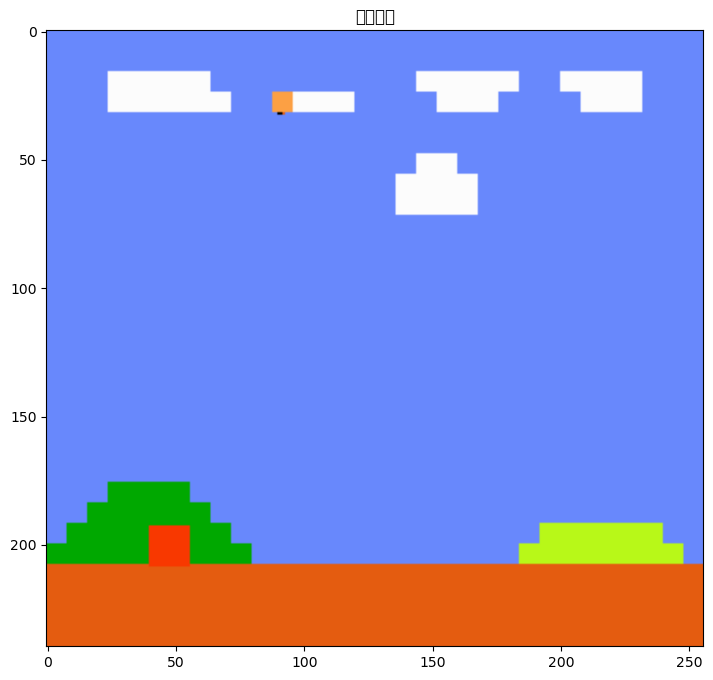

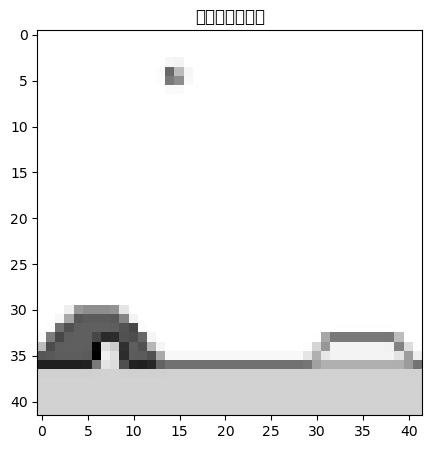

In [51]:
# 版本适应代码
try:
    # 尝试使用新版本方式
    screen = env.render()
    if screen is None or not isinstance(screen, np.ndarray):
        # 尝试旧版本方式
        screen = env.render(mode='rgb_array')
    
    # 显示图像
    plt.figure(figsize=(10, 8))
    plt.imshow(screen)
    plt.title("游戏画面")
    plt.show()
    
    # 显示下采样图像
    plt.figure(figsize=(5, 5))
    plt.imshow(downscale_obs(screen), cmap='gray')
    plt.title("下采样后的图像")
    plt.show()
    
except Exception as e:
    print(f"显示失败: {e}")
    print("尝试使用以下方法获取游戏画面:")
    print("1. env.render(mode='rgb_array')")
    print("2. env.unwrapped.ale.getScreenRGB()")
    print("3. 重新创建环境时指定 render_mode='rgb_array'")

In [52]:
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from collections import deque

def prepare_state(state): #A
    return torch.from_numpy(downscale_obs(state, to_gray=True)).float().unsqueeze(dim=0)


def prepare_multi_state(state1, state2): #B
    state1 = state1.clone()
    tmp = torch.from_numpy(downscale_obs(state2, to_gray=True)).float()
    state1[0][0] = state1[0][1]
    state1[0][1] = state1[0][2]
    state1[0][2] = tmp
    return state1


def prepare_initial_state(env, N=3):
    # 尝试获取游戏画面
    state = None
    
    # 方法1: 使用指定模式渲染
    try:
        state = env.render(mode='rgb_array')
    except (TypeError, ValueError):
        pass
        
    # 方法2: 直接渲染（如果已经指定了render_mode）
    if state is None:
        state = env.render()
        
    # 方法3: 尝试从环境中直接获取屏幕
    if state is None:
        try:
            state = env.unwrapped.ale.getScreenRGB()
        except (AttributeError, ValueError):
            pass
    
    # 如果仍然无法获取画面，创建一个空白图像
    if state is None:
        print("警告: 无法获取游戏画面，使用空白图像")
        state = np.zeros((240, 256, 3), dtype=np.uint8)
    
    # 下采样并转换为张量
    state_ = torch.from_numpy(downscale_obs(state, to_gray=True)).float()
    tmp = state_.repeat((N, 1, 1))
    return tmp.unsqueeze(dim=0)

In [53]:
def policy(qvalues, eps=None): #A
    if eps is not None:
        if torch.rand(1) < eps:
            return torch.randint(low=0,high=7,size=(1,))
        else:
            return torch.argmax(qvalues)
    else:
        return torch.multinomial(F.softmax(F.normalize(qvalues)), num_samples=1)

In [54]:
from random import shuffle
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F

class ExperienceReplay:
    def __init__(self, N=500, batch_size=100):
        self.N = N #A
        self.batch_size = batch_size #B
        self.memory = [] 
        self.counter = 0
        
    def add_memory(self, state1, action, reward, state2):
        self.counter +=1 
        if self.counter % 500 == 0: #C
            self.shuffle_memory()
            
        if len(self.memory) < self.N: #D
            self.memory.append( (state1, action, reward, state2) )
        else:
            rand_index = np.random.randint(0,self.N-1)
            self.memory[rand_index] = (state1, action, reward, state2)
    
    def shuffle_memory(self): #E
        shuffle(self.memory)
        
    def get_batch(self): #F
        if len(self.memory) < self.batch_size:
            batch_size = len(self.memory)
        else:
            batch_size = self.batch_size
        if len(self.memory) < 1:
            print("Error: No data in memory.")
            return None
        #G
        ind = np.random.choice(np.arange(len(self.memory)),batch_size,replace=False)
        batch = [self.memory[i] for i in ind] #batch is a list of tuples
        state1_batch = torch.stack([x[0].squeeze(dim=0) for x in batch],dim=0)
        action_batch = torch.Tensor([x[1] for x in batch]).long()
        reward_batch = torch.Tensor([x[2] for x in batch])
        state2_batch = torch.stack([x[3].squeeze(dim=0) for x in batch],dim=0)
        return state1_batch, action_batch, reward_batch, state2_batch

In [55]:
class Phi(nn.Module): #A
    def __init__(self):
        super(Phi, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=(3,3), stride=2, padding=1)
        self.conv2 = nn.Conv2d(32, 32, kernel_size=(3,3), stride=2, padding=1)
        self.conv3 = nn.Conv2d(32, 32, kernel_size=(3,3), stride=2, padding=1)
        self.conv4 = nn.Conv2d(32, 32, kernel_size=(3,3), stride=2, padding=1)

    def forward(self,x):
        x = F.normalize(x)
        y = F.elu(self.conv1(x))
        y = F.elu(self.conv2(y))
        y = F.elu(self.conv3(y))
        y = F.elu(self.conv4(y)) #size [1, 32, 3, 3] batch, channels, 3 x 3
        y = y.flatten(start_dim=1) #size N, 288
        return y

class Gnet(nn.Module): #B
    def __init__(self):
        super(Gnet, self).__init__()
        self.linear1 = nn.Linear(576,256)
        self.linear2 = nn.Linear(256,12)

    def forward(self, state1,state2):
        x = torch.cat( (state1, state2) ,dim=1)
        y = F.relu(self.linear1(x))
        y = self.linear2(y)
        y = F.softmax(y,dim=1)
        return y

class Fnet(nn.Module): #C
    def __init__(self):
        super(Fnet, self).__init__()
        self.linear1 = nn.Linear(300,256)
        self.linear2 = nn.Linear(256,288)

    def forward(self,state,action):
        action_ = torch.zeros(action.shape[0],12) #D
        indices = torch.stack( (torch.arange(action.shape[0]), action.squeeze()), dim=0)
        indices = indices.tolist()
        action_[indices] = 1.
        x = torch.cat( (state,action_) ,dim=1)
        y = F.relu(self.linear1(x))
        y = self.linear2(y)
        return y

In [56]:
class Qnetwork(nn.Module):
    def __init__(self):
        super(Qnetwork, self).__init__()
        #in_channels, out_channels, kernel_size, stride=1, padding=0
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=(3,3), stride=2, padding=1)
        self.conv2 = nn.Conv2d(32, 32, kernel_size=(3,3), stride=2, padding=1)
        self.conv3 = nn.Conv2d(32, 32, kernel_size=(3,3), stride=2, padding=1)
        self.conv4 = nn.Conv2d(32, 32, kernel_size=(3,3), stride=2, padding=1)
        self.linear1 = nn.Linear(288,100)
        self.linear2 = nn.Linear(100,12)
        
    def forward(self,x):
        x = F.normalize(x)
        y = F.elu(self.conv1(x))
        y = F.elu(self.conv2(y))
        y = F.elu(self.conv3(y))
        y = F.elu(self.conv4(y))
        y = y.flatten(start_dim=2)
        y = y.view(y.shape[0], -1, 32)
        y = y.flatten(start_dim=1)
        y = F.elu(self.linear1(y))
        y = self.linear2(y) #size N, 12
        return y

In [57]:
params = {
    'batch_size':150,
    'beta':0.2,
    'lambda':0.1,
    'eta': 1.0,
    'gamma':0.2,
    'max_episode_len':100,
    'min_progress':15,
    'action_repeats':6,
    'frames_per_state':3
}

replay = ExperienceReplay(N=1000, batch_size=params['batch_size'])
Qmodel = Qnetwork()
encoder = Phi()
forward_model = Fnet()
inverse_model = Gnet()
forward_loss = nn.MSELoss(reduction='none')
inverse_loss = nn.CrossEntropyLoss(reduction='none')
qloss = nn.MSELoss()
all_model_params = list(Qmodel.parameters()) + list(encoder.parameters()) #A
all_model_params += list(forward_model.parameters()) + list(inverse_model.parameters())
opt = optim.Adam(lr=0.001, params=all_model_params)

In [58]:
def loss_fn(q_loss, inverse_loss, forward_loss):
    loss_ = (1 - params['beta']) * inverse_loss
    loss_ += params['beta'] * forward_loss
    loss_ = loss_.sum() / loss_.flatten().shape[0]
    loss = loss_ + params['lambda'] * q_loss
    return loss

def reset_env():
    """
    Reset the environment and return a new initial state
    """
    env.reset()
    state1 = prepare_initial_state(env.render())
    return state1

In [59]:
def ICM(state1, action, state2, forward_scale=1., inverse_scale=1e4):
    state1_hat = encoder(state1) #A
    state2_hat = encoder(state2)
    state2_hat_pred = forward_model(state1_hat.detach(), action.detach()) #B
    forward_pred_err = forward_scale * forward_loss(state2_hat_pred, \
                        state2_hat.detach()).sum(dim=1).unsqueeze(dim=1)
    pred_action = inverse_model(state1_hat, state2_hat) #C
    inverse_pred_err = inverse_scale * inverse_loss(pred_action, \
                                        action.detach().flatten()).unsqueeze(dim=1)
    return forward_pred_err, inverse_pred_err

In [60]:
def minibatch_train(use_extrinsic=True):
    state1_batch, action_batch, reward_batch, state2_batch = replay.get_batch() 
    action_batch = action_batch.view(action_batch.shape[0],1) #A
    reward_batch = reward_batch.view(reward_batch.shape[0],1)
    
    forward_pred_err, inverse_pred_err = ICM(state1_batch, action_batch, state2_batch) #B
    i_reward = (1. / params['eta']) * forward_pred_err #C
    reward = i_reward.detach() #D
    if use_explicit: #E
        reward += reward_batch 
    qvals = Qmodel(state2_batch) #F
    reward += params['gamma'] * torch.max(qvals)
    reward_pred = Qmodel(state1_batch)
    reward_target = reward_pred.clone()
    indices = torch.stack( (torch.arange(action_batch.shape[0]), \
    action_batch.squeeze()), dim=0)
    indices = indices.tolist()
    reward_target[indices] = reward.squeeze()
    q_loss = 1e5 * qloss(F.normalize(reward_pred), F.normalize(reward_target.detach()))
    return forward_pred_err, inverse_pred_err, q_loss

In [61]:
epochs = 5000
env.reset()
state1 = prepare_initial_state(env.render())
eps=0.15
losses = []
episode_length = 0
switch_to_eps_greedy = 1000
state_deque = deque(maxlen=params['frames_per_state'])
e_reward = 0.
last_x_pos = 0 #A
#ep_lengths = []
use_explicit = False
for i in range(epochs):
    opt.zero_grad()
    episode_length += 1
    q_val_pred = Qmodel(state1) #B
    if i > switch_to_eps_greedy: #C
        action = int(policy(q_val_pred,eps))
    else:
        action = int(policy(q_val_pred))
    for j in range(params['action_repeats']): #D
        state2, e_reward_, done, trunc, info = env.step(action)
        last_x_pos = info['x_pos']
        if done:
            state1 = reset_env()
            break
        e_reward += e_reward_
        state_deque.append(prepare_state(state2))
    state2 = torch.stack(list(state_deque),dim=1) #E
    replay.add_memory(state1, action, e_reward, state2) #F
    e_reward = 0
    if episode_length > params['max_episode_len']: #G
        if (info['x_pos'] - last_x_pos) < params['min_progress']:
            done = True
        else:
            last_x_pos = info['x_pos']
    if done or trunc:
        #ep_lengths.append(info['x_pos'])
        state1 = reset_env()
        last_x_pos = 0
        episode_length = 0
    else:
        state1 = state2
    if len(replay.memory) < params['batch_size']:
        continue
    forward_pred_err, inverse_pred_err, q_loss = minibatch_train(use_extrinsic=False) #H
    loss = loss_fn(q_loss, forward_pred_err, inverse_pred_err) #I
    loss_list = (q_loss.mean(), forward_pred_err.flatten().mean(),\
    inverse_pred_err.flatten().mean())
    losses.append(loss_list)
    loss.backward()
    opt.step()

AttributeError: 'NoneType' object has no attribute 'render'

In [62]:
done = True
state_deque = deque(maxlen=params['frames_per_state'])
for step in range(500):
    if done:
        env.reset()
        state1 = prepare_initial_state(env.render())
    q_val_pred = Qmodel(state1)
    action = int(policy(q_val_pred,eps))
    state2, reward, done, trunc, info = env.step(action)
    state2 = prepare_multi_state(state1,state2)
    state1=state2
    env.render()

AttributeError: 'NoneType' object has no attribute 'render'